## Obligatory imports

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

# MNIST Dataset

In [ ]:
# Please click "Stay on page" on the popup!
import IPython.core.display
import requests

url = 'http://yann.lecun.com/exdb/mnist/'
IPython.core.display.display_html(requests.get(url).text, raw=True)

## Fetch the data

In [ ]:
from sklearn.datasets import fetch_mldata

In [ ]:
mnist = fetch_mldata('MNIST original', data_home='../data/')

In [ ]:
allimages = mnist.data
allimages.shape

In [ ]:
all_image_labels = mnist.target
[int(x) for x in set(all_image_labels)]

## check out the data

In [ ]:
digit1 = mnist.data[0,:].reshape(28,-1) # arr.reshape(4, -1) is equivalent to arr.reshape(4, 7), is arr has size 28

In [ ]:
plt.imshow(digit1, vmin=0, vmax=1)

## Classify using Logistic Regression

### Separate the data into training data and test data

In [ ]:
len(allimages)

### Sample the data, 70000 is too many images to handle on a single PC

In [ ]:
len(allimages)

In [ ]:
size_desired_dataset = 2000

In [ ]:
sample_idx = np.random.choice(len(allimages), size_desired_dataset)
images = allimages[sample_idx, :]
image_labels = all_image_labels[sample_idx]

In [ ]:
set(image_labels)

In [ ]:
image_labels.shape

### Partition into training and test set *randomly*

**As a rule of thumb, 80/20 split between training/test dataset is often recommended.**
See below for cross validation and how that changes this thumbrule.


In [ ]:
ntraining = int(len(images)*0.8)

training_idxs = np.random.choice(len(images), ntraining)
test_idxs = np.array(list(set(range(len(images))) - set(training_idxs)))


training_data, training_labels = images[training_idxs, :], image_labels[training_idxs]
test_data, test_labels = images[test_idxs, :], image_labels[test_idxs]

### More useful way:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
training_data, test_data, training_labels, test_labels = train_test_split(images, image_labels, train_size=0.8)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(multi_class='ovr')

In [ ]:
training_labels.shape

In [ ]:
lr.fit(training_data, training_labels)

In [ ]:
lr.score(test_data, test_labels)

In [ ]:
lr.predict(test_data[25].reshape(1,-1))[0]

In [ ]:
plt.imshow(test_data[25].reshape(28,-1), vmin=0, vmax=1)

In [ ]:
predicted_labels = lr.predict(test_data)

In [ ]:
(predicted_labels != test_labels).sum()/len(test_labels)

### Show some sample outputs 

In [ ]:
test_data.shape

In [ ]:
test_dataidxs = np.random.choice(len(test_data), 10)

fig, axes = plt.subplots(10,2, figsize=(3,10))
plt.axis('off')
sns.despine(left=True, bottom=True)
sns.set_style('whitegrid')
for i in range(10):
    idx = test_dataidxs[i]
    
    axes[i][0].imshow(test_data[idx].reshape(28,-1)[::-1,:], vmin=0, vmax=1, origin = 'upper')
    axes[i][1].text(0,0,int(lr.predict(test_data[idx,:].reshape(1,-1))), fontsize=30)
    axes[i][0].set_xlim(0,28)
    axes[i][0].set_ylim(0,28)
    axes[i][1].set_xlim(0,0.2)
    axes[i][1].set_ylim(0,0.2)
    
    axes[i][0].get_xaxis().set_visible(False)
    axes[i][0].get_yaxis().set_visible(False)
    axes[i][1].get_xaxis().set_visible(False)
    axes[i][1].get_yaxis().set_visible(False)


## Evaluating goodness of the classification

In [ ]:
matplotlib.rcParams['figure.figsize'] = (6,4)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
training_data, test_data, training_labels, test_labels = train_test_split(images, image_labels, train_size=0.1)
lr.fit(training_data, training_labels)

In [ ]:
predicted_test_labels = lr.predict(test_data)

In [ ]:
confmat = confusion_matrix(test_labels, predicted_test_labels, labels = range(10))
confmat

In [ ]:
plt.matshow(confmat, cmap = 'viridis')
plt.colorbar(shrink = 0.8)
plt.grid('off')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
_ = plt.xticks(range(10))
_ = plt.yticks(range(10))

## Under the hood: decision boundary

**Logistic regression draws a **planar decision boundary**
 in the `num_feature`-dimentional space (in the case of handwritten images, this is the number of pixels in each image).


![Image of Yaktocat](http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/09/nn-from-scratch-lr-decision-boundary.png)

**Multiclass Classification**

So how dows Logistic Regression work for multiple classes (like multiple digits)?

One answer is 'ovr', or one-vs-rest classification.

Easy example with just 3 classes:
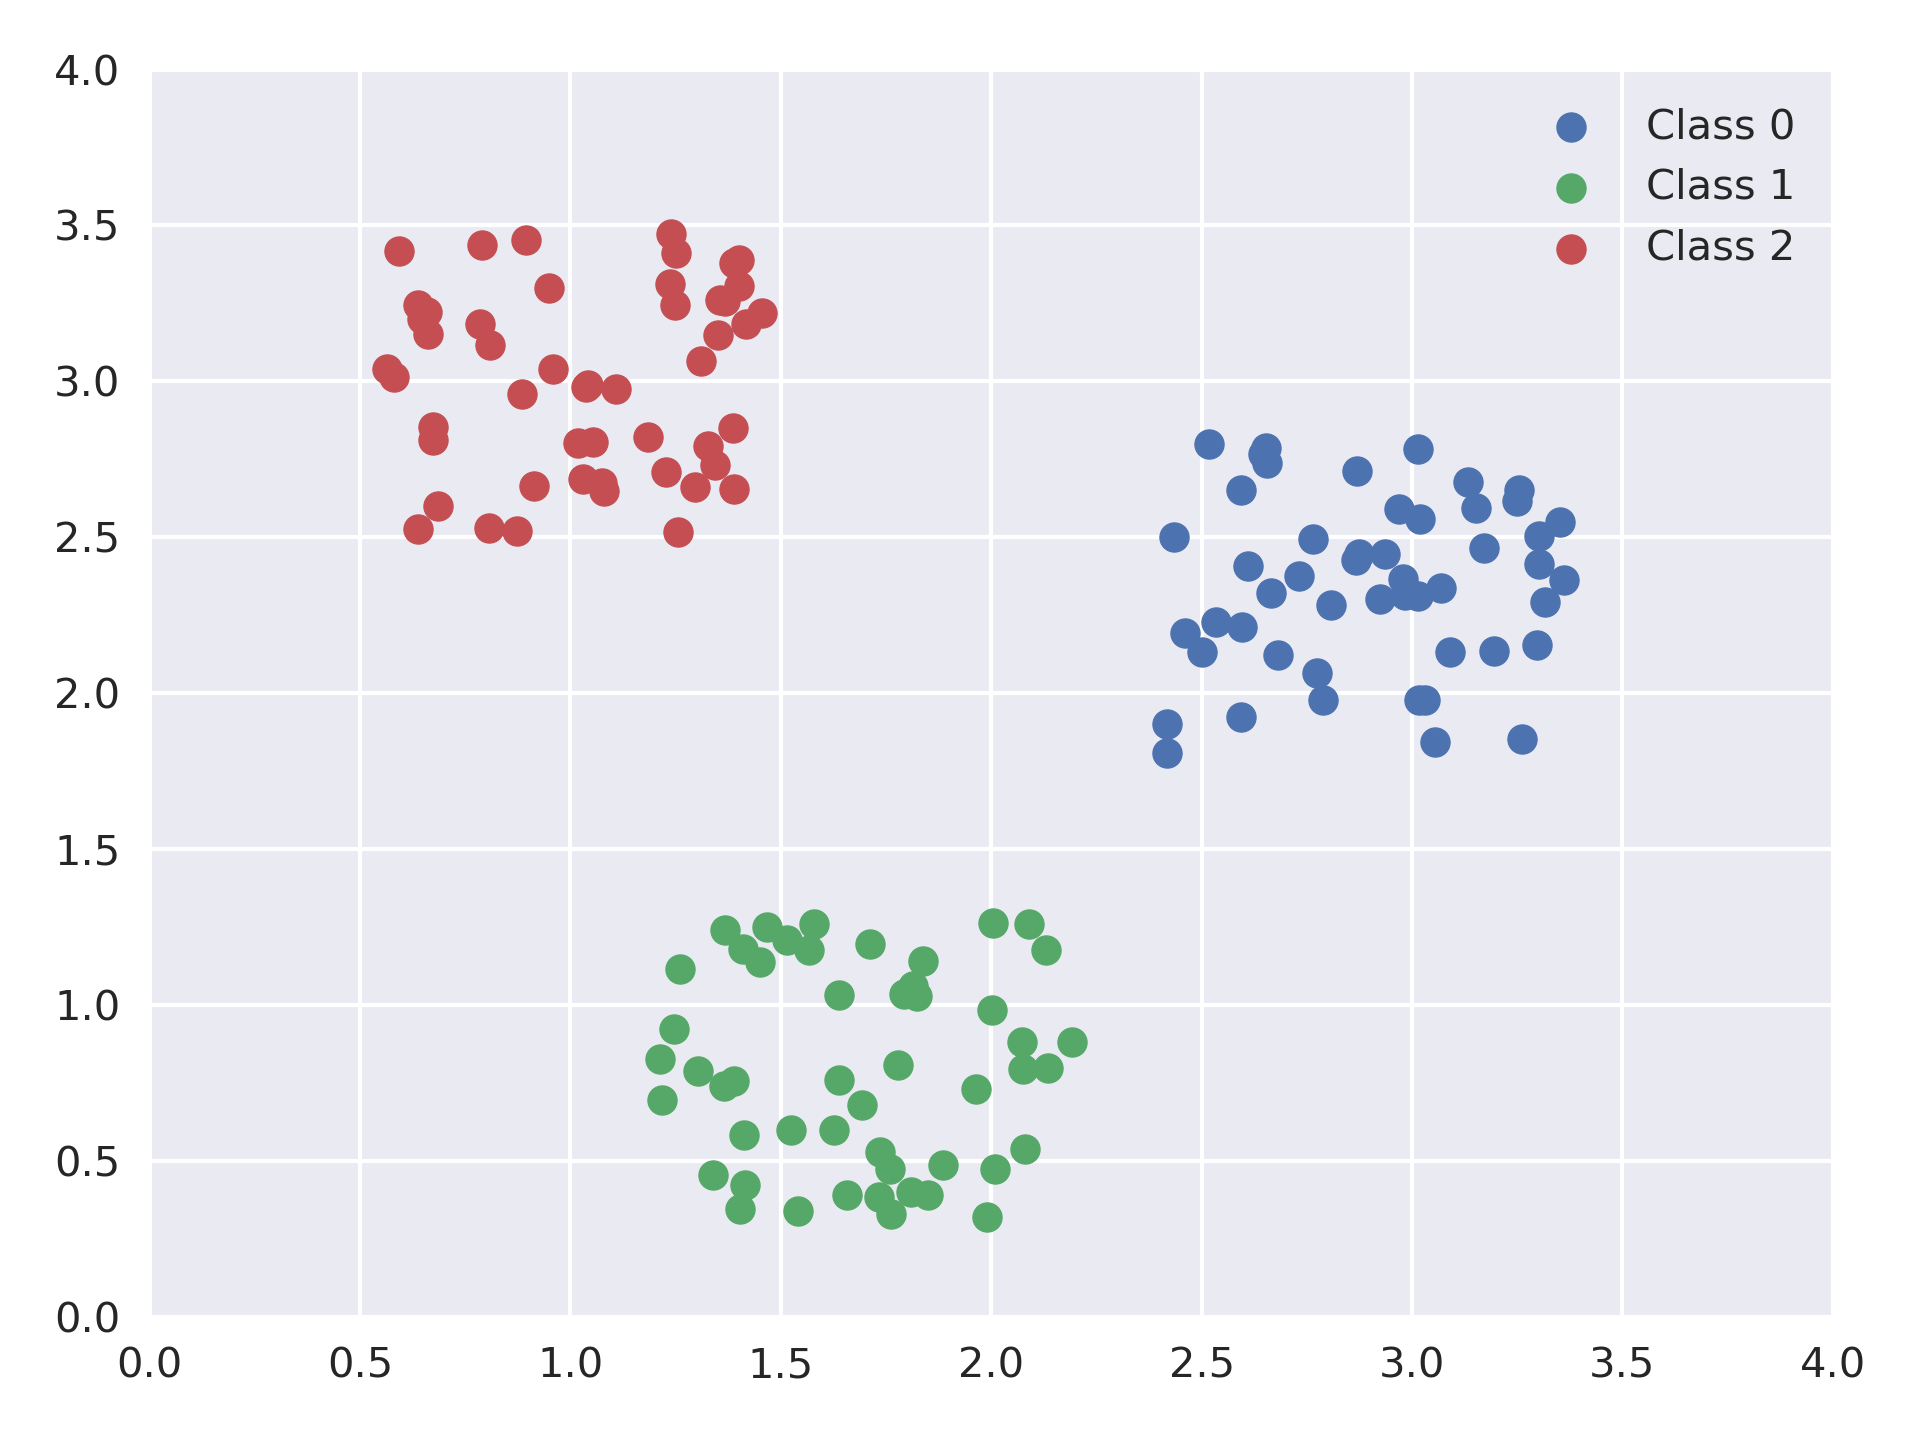

The idea is:
For $n$ classes, train $n$ logistic classifiers. One for each class, always against the "rest":
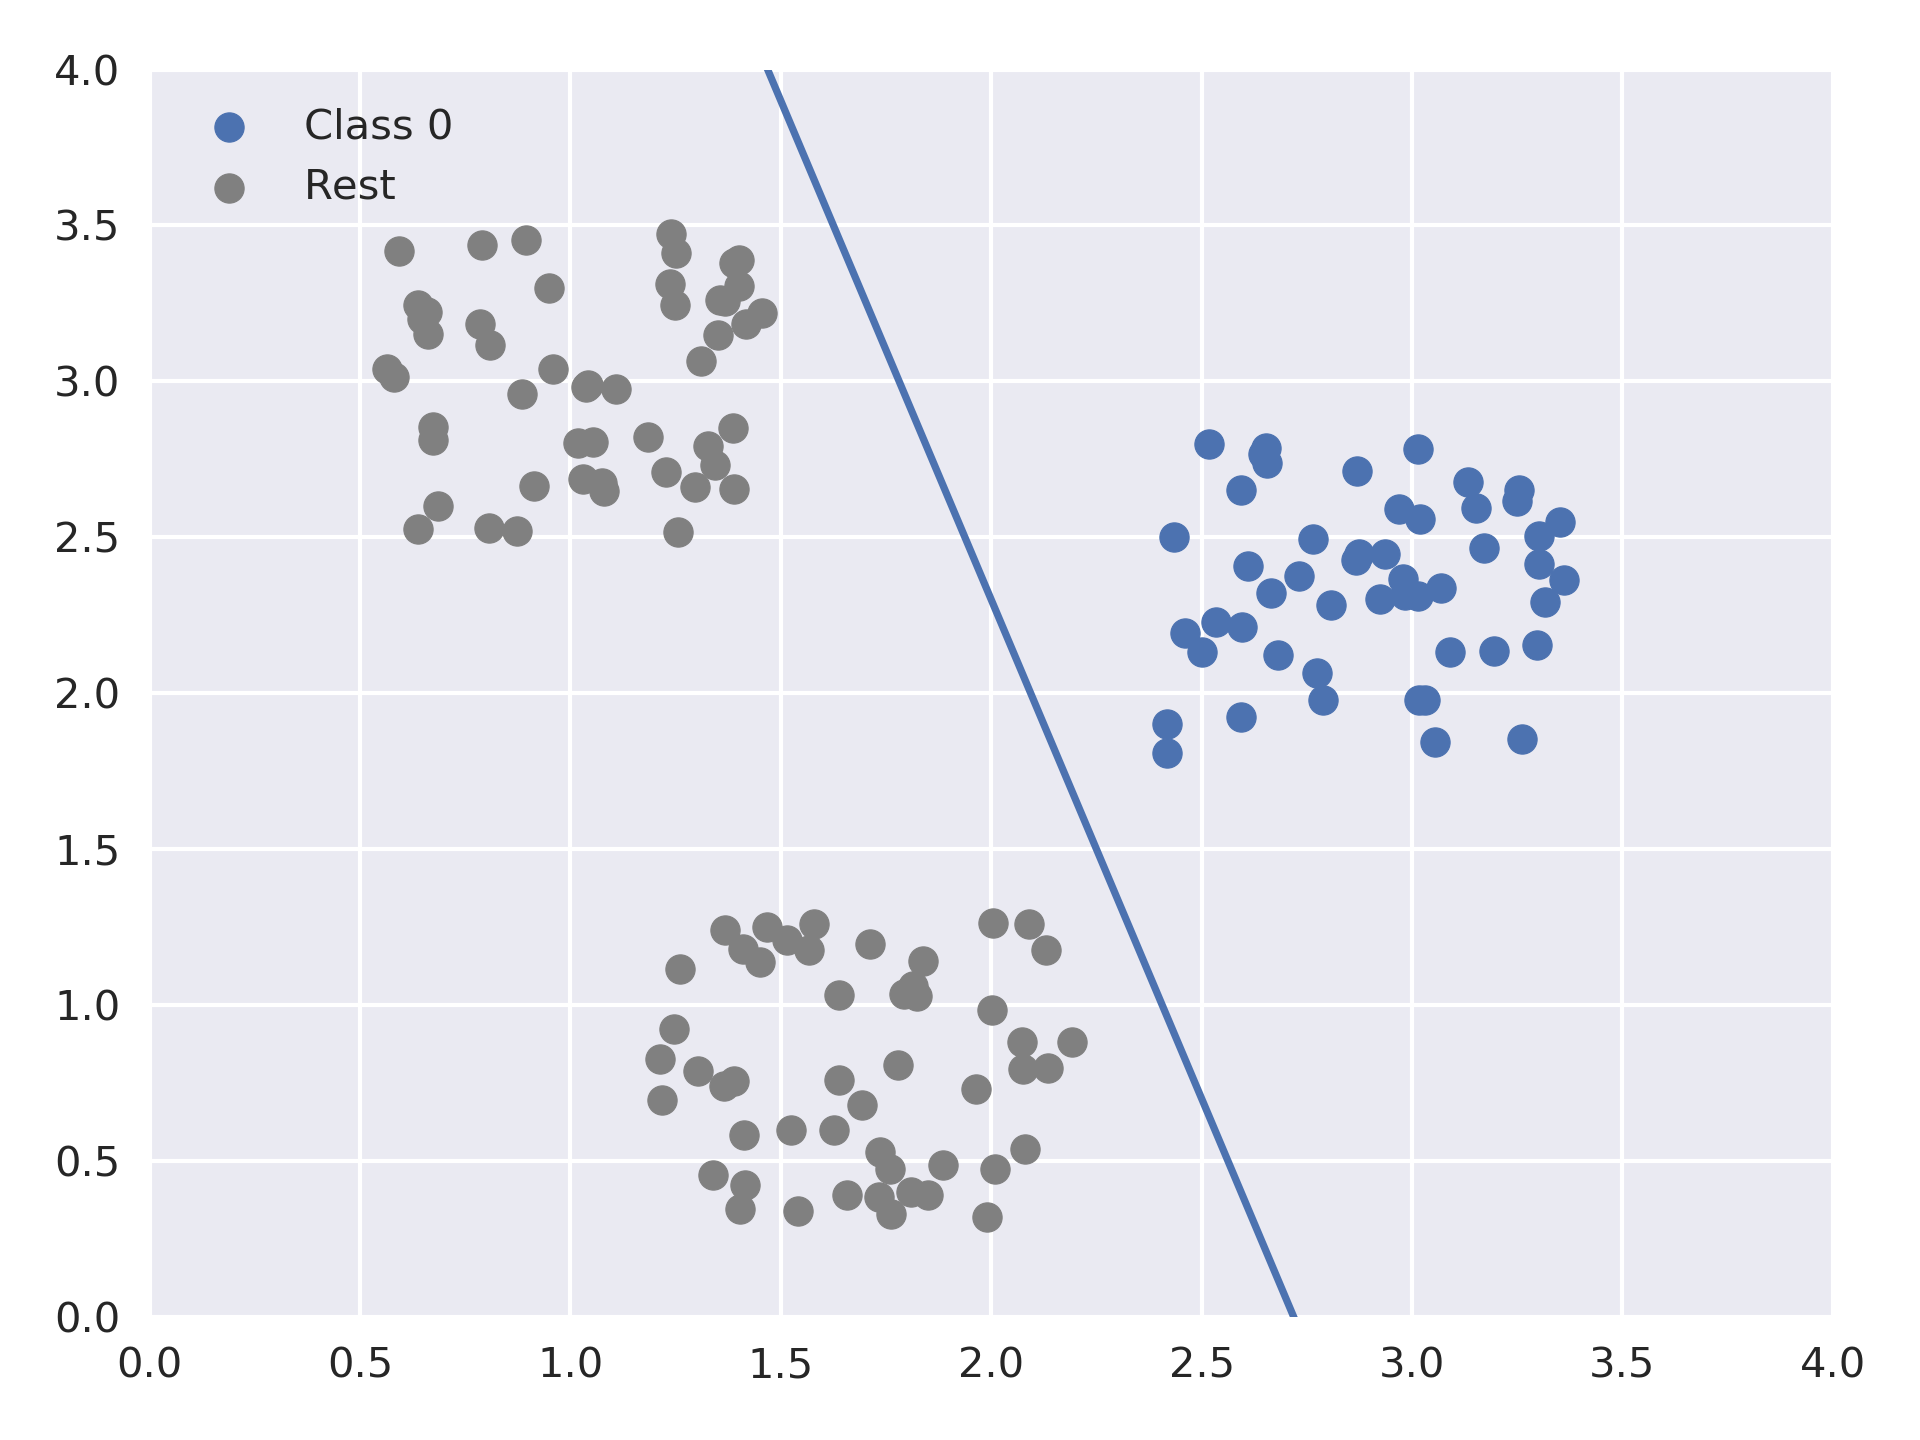
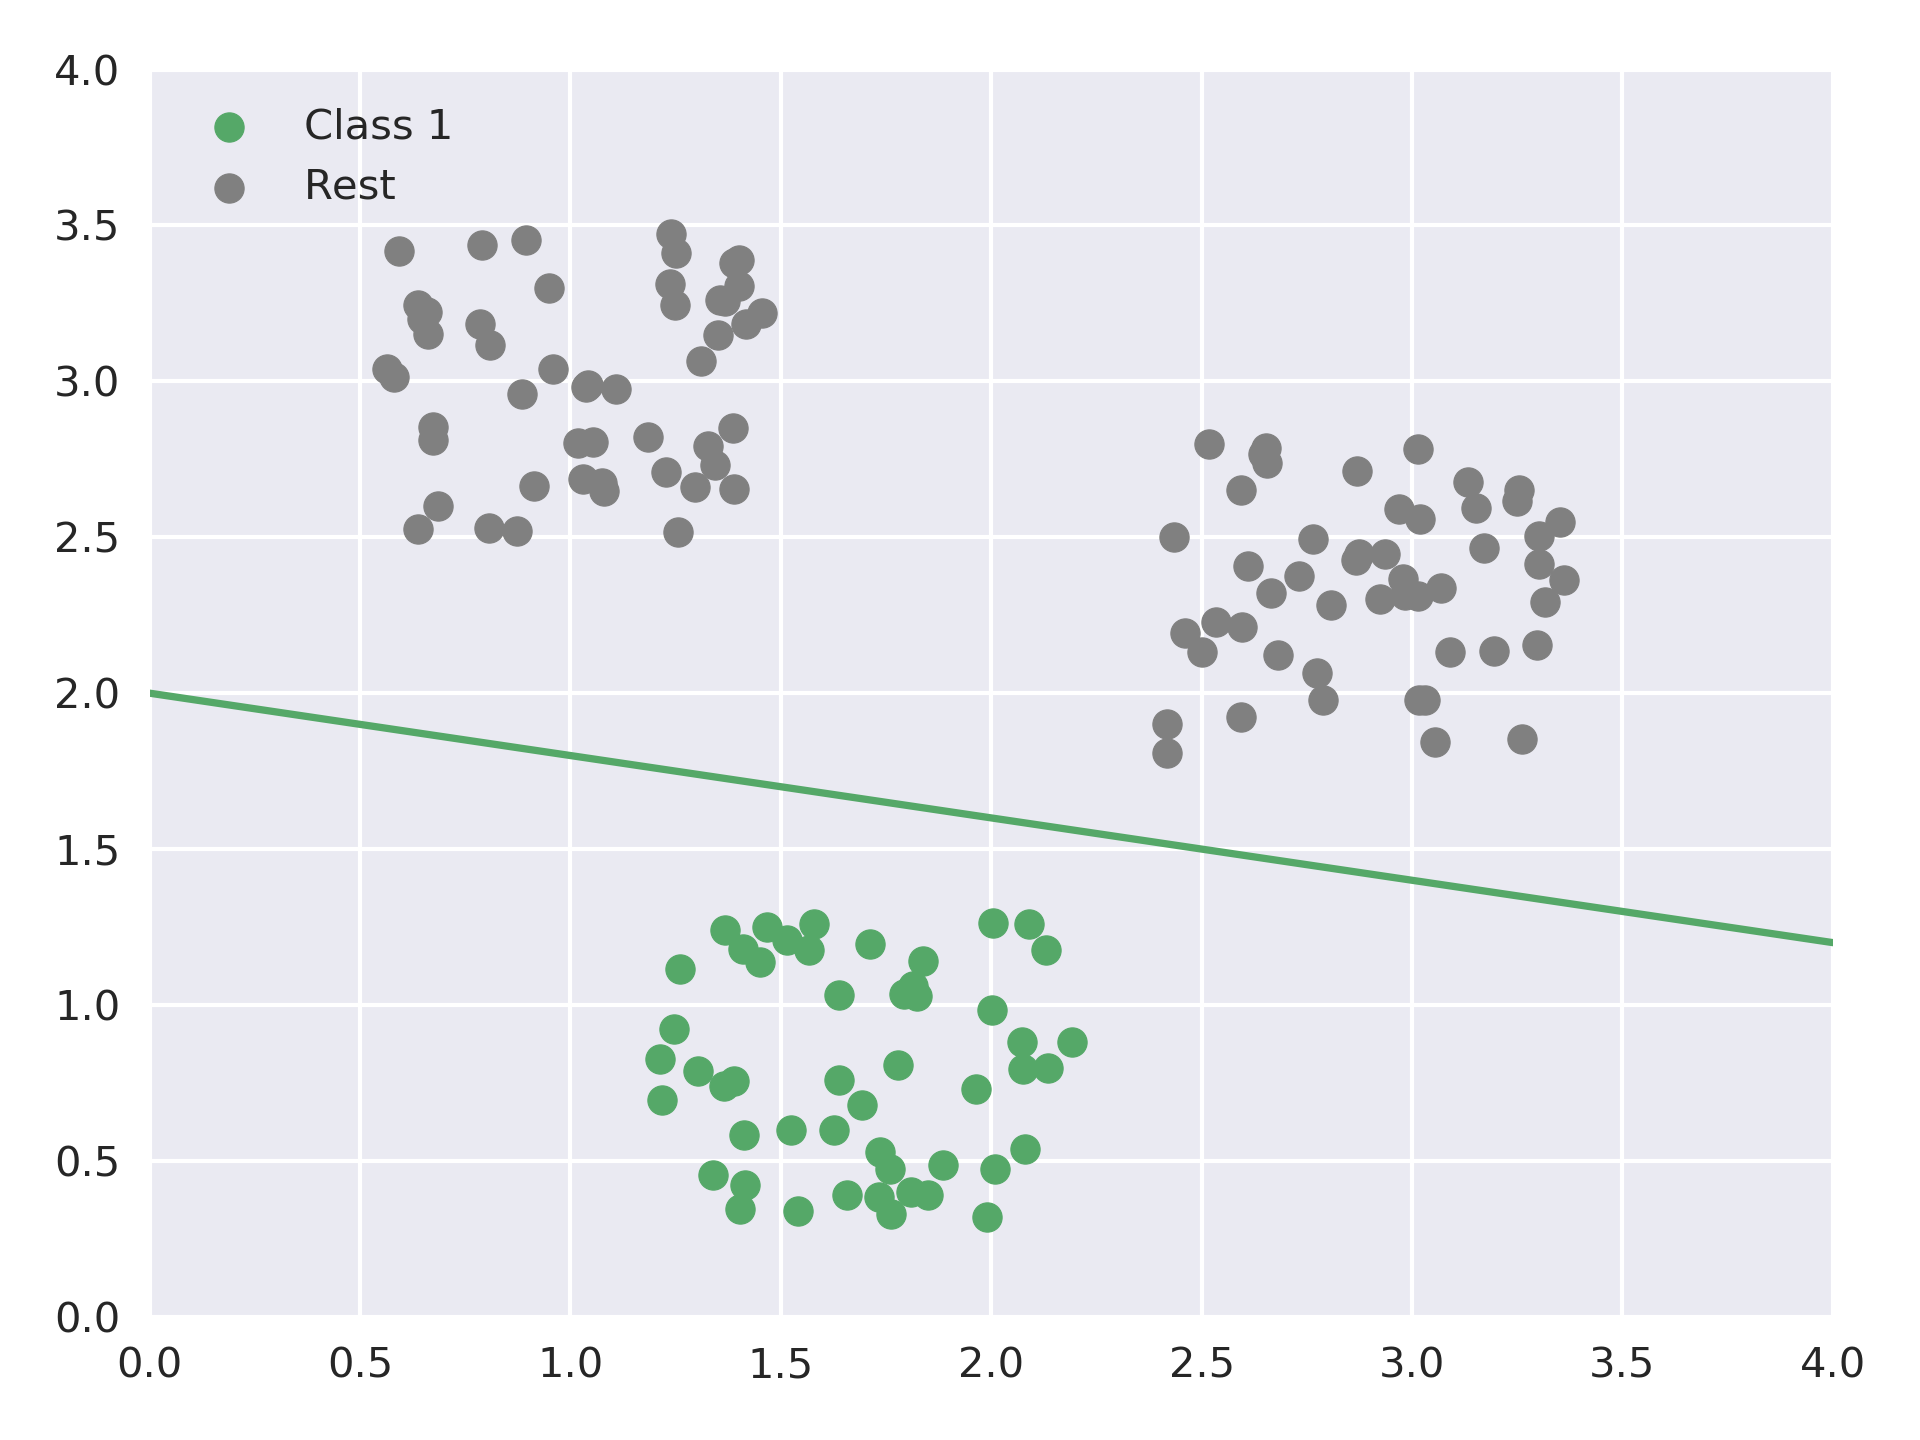
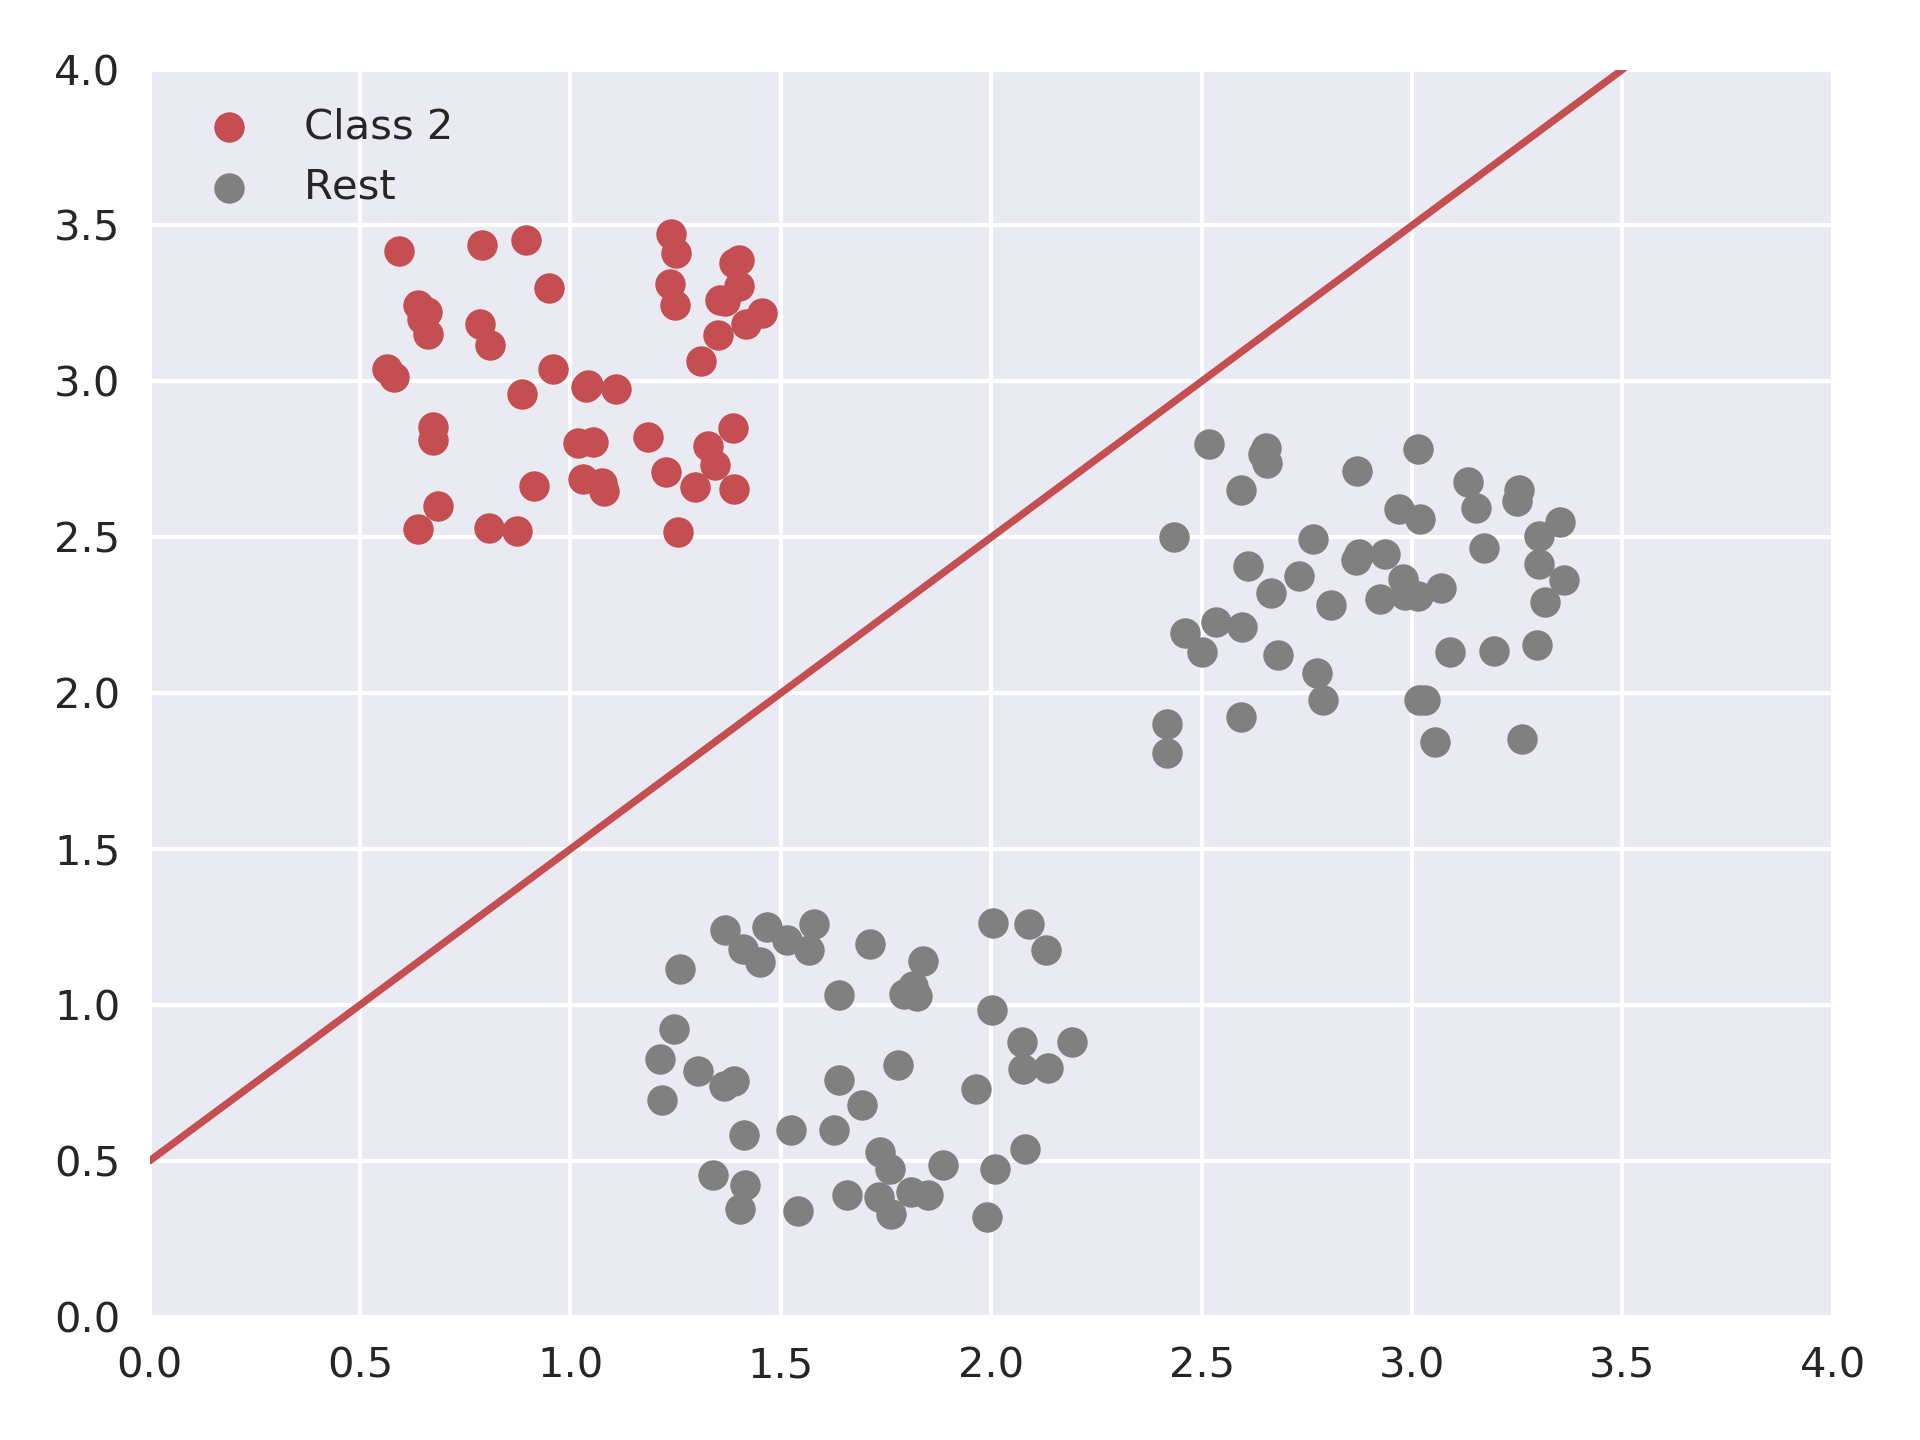



Now, to predict the label, calculate the predicted probability for each (sub-)classifier. Put it into the category where this probablity is the highest.



**A bit of math**

Given $n$ features, and $m$ independent data rows,
$$
\underbrace{\min}_{C_1,C_2,\cdots,C_n}  \sum_{j=1}^m \left(y^{\text{pred}}_j - y^{\text{actual}}_j\right)^2 \\
\text{Where decision boundary}  = C_1x_1 + C_2x_2 + \cdots + C_nx_n 
$$


**Therefore, it is evident that if the number of features is too low, the decision boundary won't be able to partition the data correctly. **
![](http://openclassroom.stanford.edu/MainFolder/courses/MachineLearning/exercises/ex8materials/ex8b_100.png)

**Two solutions**
* Increase number of features, since this will draw the decision boundary in a higher dimension, and hopefully resulting in finer grained partition. (This runs the risk of *overfitting*, discussed below ).
* Use methods other than Logistic regression, that are capable of **non-planar** i.e. curved decision boundaries.

## Overfitting
![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/400px-Overfitting.svg.png)

Schematic diagram, of course for Logistic regression, decision boundary cannot be non-planar.

## How to detect overfitting: Cross validation and learning curve

In [ ]:
matplotlib.rcParams['figure.figsize'] = (4,3)
train_sizes = np.linspace(0.05, 0.99, 10)

train_scores = []
test_scores = []

for ntraining in train_sizes:
    training_data, test_data, training_labels, test_labels = train_test_split(images, image_labels, train_size=ntraining)
    
    lr.fit(training_data, training_labels)
    
    train_scores.append(lr.score(training_data, training_labels))
    test_scores.append(lr.score(test_data, test_labels))
    
plt.plot(train_sizes, train_scores, label = 'training score')
plt.plot(train_sizes, test_scores, label = 'test score')
plt.xlabel('training set size')
plt.legend() 

##  Cross-validation is built into scipy

In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
curve = learning_curve(lr, images, image_labels, train_sizes= np.linspace(0.03, 0.99, 10), cv = 18, n_jobs = 12)

In [ ]:
train_sizes, train_scores, test_scores = curve

In [ ]:
train_scores = pd.DataFrame(train_scores)
train_scores.loc[:,'train_size'] = train_sizes
test_scores = pd.DataFrame(test_scores)
test_scores.loc[:,'train_size'] = train_sizes

In [ ]:
test_scores.head()

In [ ]:
train_scores = pd.melt(train_scores, id_vars=['train_size'], value_name = 'CrossVal score')
test_scores = pd.melt(test_scores, id_vars=['train_size'], value_name = 'CrossVal score')

In [ ]:
train_scores.head()

In [ ]:
test_scores.head()

In [ ]:
matplotlib.rcParams['figure.figsize'] = (4,3)
sns.tsplot(train_scores, time = 'train_size', unit='variable', value = 'CrossVal score')
sns.tsplot(test_scores, time = 'train_size', unit='variable', value = 'CrossVal score', color='g')

## Rules of thumb:
* **Training score low, test score low**: You are underfitting.
    - Increase number of features (e.g. higher resolution images).
    - Getting more training data is useless.
* **Training score high, but test score low**: You are overfitting.
    - Reduce number of features. 
    - Increase test set size.
    - Increase Regularization (Discussed below).

# Iris dataset

In [ ]:
df  = sns.load_dataset('iris')

In [ ]:
df.head()

In [ ]:
features = np.array(df.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
labels = df.loc[:, 'species']

In [ ]:
training_data, test_data, training_labels, test_labels = train_test_split(features, labels, train_size=0.5)

In [ ]:
lr.fit(training_data, training_labels)

In [ ]:
lr.score(test_data, test_labels)

In [ ]:
curve = learning_curve(lr, features, labels, train_sizes= np.linspace(40,99,10).astype(int), n_jobs = 12)
train_sizes, train_scores, test_scores = curve

train_scores = pd.DataFrame(train_scores)
train_scores.loc[:,'train_size'] = train_sizes
test_scores = pd.DataFrame(test_scores)
test_scores.loc[:,'train_size'] = train_sizes

train_scores.head()

In [ ]:
train_scores = pd.melt(train_scores, id_vars=['train_size'], value_name = 'CrossVal score')
test_scores = pd.melt(test_scores, id_vars=['train_size'], value_name = 'CrossVal score')

In [ ]:
train_scores.head()

In [ ]:
matplotlib.rcParams['figure.figsize'] = (4,3)
sns.tsplot(train_scores, time = 'train_size', unit='variable', value = 'CrossVal score')
sns.tsplot(test_scores, time = 'train_size', unit='variable', value = 'CrossVal score', color='g')
plt.legend()

## Feature engineering

In [ ]:
features = np.array(df.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
labels = df.loc[:, 'species']

### Add more columns out of existing columns

In [ ]:
num_cols = 4

for i in range(num_cols):
    for j in range(num_cols):
        features = np.hstack((features,(features[:,i]*features[:,j]).reshape(-1,1)))

In [ ]:
training_data, test_data, training_labels, test_labels = train_test_split(features, labels, train_size=0.5)

lr.fit(training_data, training_labels)

In [ ]:
lr.score(test_data, test_labels)

In [ ]:
curve = learning_curve(lr, features, labels, train_sizes= np.linspace(40,99,10).astype(int), n_jobs = 12)
train_sizes, train_scores, test_scores = curve

In [ ]:
train_scores = pd.DataFrame(train_scores)
train_scores.loc[:,'train_size'] = train_sizes
test_scores = pd.DataFrame(test_scores)
test_scores.loc[:,'train_size'] = train_sizes

In [ ]:
train_scores.head()

In [ ]:
train_scores = pd.melt(train_scores, id_vars=['train_size'], value_name = 'CrossVal score')
test_scores = pd.melt(test_scores, id_vars=['train_size'], value_name = 'CrossVal score')

In [ ]:
matplotlib.rcParams['figure.figsize'] = (4,3)
sns.tsplot(train_scores, time = 'train_size', unit='variable', value = 'CrossVal score')
sns.tsplot(test_scores, time = 'train_size', unit='variable', value = 'CrossVal score', color='g')
plt.legend()

### Why not go further: Overfitting

In [ ]:
features = np.array(df.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
labels = df.loc[:, 'species']

In [ ]:
num_cols = 4

for i in range(num_cols):
    for j in range(num_cols):
        features = np.hstack((features,(features[:,i]*features[:,j]).reshape(-1,1)))

for i in range(num_cols):
    for j in range(num_cols):
        for k in range(num_cols):
            features = np.hstack((features,(features[:,i]*features[:,j]*features[:,k]).reshape(-1,1)))
            
            
for i in range(num_cols):
    for j in range(num_cols):
        for k in range(num_cols):
            for l in range(num_cols):
                features = np.hstack((features,(features[:,i]*features[:,j]*features[:,k]*features[:,l]).reshape(-1,1)))
                
                
for i in range(num_cols):
    for j in range(num_cols):
        for k in range(num_cols):
            for l in range(num_cols):
                for m in range(num_cols):
                    features = np.hstack((features,(features[:,i]*features[:,j]*features[:,k]*features[:,l]*features[:,m]).reshape(-1,1)))
                    
for i in range(num_cols):
    for j in range(num_cols):
        for k in range(num_cols):
            for l in range(num_cols):
                for m in range(num_cols):
                    for n in range(num_cols):
                        features = np.hstack((features,(features[:,i]*features[:,j]*features[:,k]*features[:,l]*features[:,m]*features[:,n]).reshape(-1,1)))

In [ ]:
features.shape

In [ ]:
training_data, test_data, training_labels, test_labels = train_test_split(features, labels, train_size=0.5)

In [ ]:
lr.fit(training_data, training_labels)

In [ ]:
lr.score(test_data, test_labels)

In [ ]:
curve = learning_curve(lr, features, labels, train_sizes= np.linspace(40,99,10).astype(int), n_jobs = 12)
train_sizes, train_scores, test_scores = curve

In [ ]:
train_scores = pd.DataFrame(train_scores)
train_scores.loc[:,'train_size'] = train_sizes
test_scores = pd.DataFrame(test_scores)
test_scores.loc[:,'train_size'] = train_sizes

In [ ]:
train_scores = pd.melt(train_scores, id_vars=['train_size'], value_name = 'CrossVal score')
test_scores = pd.melt(test_scores, id_vars=['train_size'], value_name = 'CrossVal score')

In [ ]:
matplotlib.rcParams['figure.figsize'] = (4,3)
sns.tsplot(train_scores, time = 'train_size', unit='variable', value = 'CrossVal score')
sns.tsplot(test_scores, time = 'train_size', unit='variable', value = 'CrossVal score', color='g')
plt.legend()

## Regularization
**The goal:** Avoid overfitting
**Approach:** Penalize *complexity* of the model e.g. "non-smoothness" of the function.
  - Ex: During Logistic regression fit, add a term $\sum_j C_j^2$ to the cost function:
Given $n$ features, and $m$ independent data rows,
$$
\underbrace{\min}_{C_1,C_2,\cdots,C_n}  \sum_{j=1}^m \left(y^{\text{pred}}_j - y^{\text{actual}}_j\right)^2 + \lambda\sum_{i=1}^n C_i^2\\
\text{Where decision boundary}  = C_1x_1 + C_2x_2 + \cdots + C_nx_n 
$$
  
  
  
```python
lr = LogisticRegression(C=0.8) # the regularization parameter
```


## Separating cross validation data from test data
We use cross validation to see
  * If the features are indeed the right features for classifying.
  * If yes, then still we normally need to train the LR classifier with certain parameters (e.g. C the regularization parameter).
  * We can use the learning curve to tune our LR classifier, i.e. choose a regularization parameter. Recall, a good clasifier has
    - Both training and test score increases and reached a  quite high stable value when training set size is increased.  
    - The difference between training scotre and test score is low at that point.

Now, the moment we make a decision (i.e. choosing the regularization parameter), we should test against *another* independent dataset if the classifier still performs as it did for the cross validation set. 

That's why, a  **60/20/20** split between **training/CV/test** dataset is often recommended. 

# Exercise 1
1. Download the [student performance dataset](http://archive.ics.uci.edu/ml/datasets/student+performance). 
2. Logistic regression can only work with numeric or Boolean features. Therefore, choose a subset of features from the dataset and, if necessary, transform them into numeric or Boolean form. (Hint: The `.replace()` function on a pandas dataframe can be useful here.)
3. Split the data into training set and test set using `train_test_split`.
4. Fit a logistic regression classifier and check the score. 
5. Plot the confusion matrix. 
6. Using different training data size, plot the learning curve. 

# Exercise 2
1. Load the dataset using the `sklearn.datasets.load_wine()` function
2. Check out the dataset by looking at its 'DESCR', 'feature_names' and 'target_names' attributes
3. Split the data into training set and test set using `train_test_split`.
4. Train a logistic regression classifier and check the score.
5. Try different regularization values and check the score again.

## Further reading
* http://www.ritchieng.com/applying-machine-learning/
    